In [1]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('data.csv')
data.head(5)

,Type,Question,Text,Solving a communicative task,Text structure,Use of English (for emails),Lexis (essay),Grammatical accuracy (essay),Punctuation and spelling (essay),Comments,Overall_score,origin,task_image,score_image
0,Essay,Imagine that you are doing a project on what s...,My current school project is aimed at finding ...,3,3.0,NaN,3.0,3.0,2.0,NaN,14,Просторы интернета,NaN,NaN
1,Essay,Imagine that you are doing a project on what p...,Today we all live in the age of technology. Sm...,2,3.0,NaN,3.0,2.0,2.0,По критерию РКЗ ставится 2 балла: «Задание вып...,12,ФИПИ,NaN,NaN
2,Email,…I am so happy that summer has come and we are...,"Dear Ronny, I was glad to hear from you again....",1,2.0,2,NaN,NaN,NaN,К1 – 1 (отсутствует третий аспект). Лексико-гр...,5,ФИПИ,NaN,NaN
3,Email,…I am learning to cook from my mother now. But...,"Dear Mary, Thanks for your message. It was gre...",1,2.0,2,NaN,NaN,NaN,По критерию «Решение коммуникативной задачи»: ...,5,ФИПИ,NaN,NaN
4,Email,…I am so happy that summer has come and we are...,Moscow\n15 october\nHi!\nThanks you for you re...,1,0.0,0,NaN,NaN,NaN,По ОТ допущены следующие нарушения.\r\n1. Указ...,1,ФИПИ,NaN,NaN


In [37]:
# Удаляем лишние столбцы (на данный момент)
columns_to_drop = ['Comments', 'origin', 'task_image', 'score_image']

# Удаление столбцов
data = data.drop(columns=columns_to_drop)

data.head(5)

,Type,Question,Text,Solving a communicative task,Text structure,Use of English (for emails),Lexis (essay),Grammatical accuracy (essay),Punctuation and spelling (essay),Overall_score
0,Essay,Imagine that you are doing a project on what s...,My current school project is aimed at finding ...,3,3.0,NaN,3.0,3.0,2.0,14
1,Essay,Imagine that you are doing a project on what p...,Today we all live in the age of technology. Sm...,2,3.0,NaN,3.0,2.0,2.0,12
2,Email,…I am so happy that summer has come and we are...,"Dear Ronny, I was glad to hear from you again....",1,2.0,2,NaN,NaN,NaN,5
3,Email,…I am learning to cook from my mother now. But...,"Dear Mary, Thanks for your message. It was gre...",1,2.0,2,NaN,NaN,NaN,5
4,Email,…I am so happy that summer has come and we are...,Moscow\n15 october\nHi!\nThanks you for you re...,1,0.0,0,NaN,NaN,NaN,1


In [38]:
# Посмотрим, какие значения есть в колонках с баллами
columns = ['Solving a communicative task', 'Text structure', 'Use of English (for emails)', 'Lexis (essay)', 'Grammatical accuracy (essay)', 'Punctuation and spelling (essay)']

for column in columns:
    print(f"Уникальные значения в '{column}': {data[column].unique()}")

Уникальные значения в 'Solving a communicative task': ['3' '2' '1' '0' 'Проверить' 'Перепроверить'
 'Посмотреть оценку в комменте' 'Проверить ']
Уникальные значения в 'Text structure': [ 3.  2.  0.  1. nan]
Уникальные значения в 'Use of English (for emails)': [nan '2' '0' '1' 'Проверить']
Уникальные значения в 'Lexis (essay)': [ 3. nan  1.  0.  2.]
Уникальные значения в 'Grammatical accuracy (essay)': [ 3.  2. nan  1.  0.]
Уникальные значения в 'Punctuation and spelling (essay)': [ 2. nan  0.]


In [39]:
# Удаляем строки баллов, если там сожержатся другие значения, кроме int и float (избавимся от string)
for column in columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.head(5)

,Type,Question,Text,Solving a communicative task,Text structure,Use of English (for emails),Lexis (essay),Grammatical accuracy (essay),Punctuation and spelling (essay),Overall_score
0,Essay,Imagine that you are doing a project on what s...,My current school project is aimed at finding ...,3.0,3.0,NaN,3.0,3.0,2.0,14
1,Essay,Imagine that you are doing a project on what p...,Today we all live in the age of technology. Sm...,2.0,3.0,NaN,3.0,2.0,2.0,12
2,Email,…I am so happy that summer has come and we are...,"Dear Ronny, I was glad to hear from you again....",1.0,2.0,2.0,NaN,NaN,NaN,5
3,Email,…I am learning to cook from my mother now. But...,"Dear Mary, Thanks for your message. It was gre...",1.0,2.0,2.0,NaN,NaN,NaN,5
4,Email,…I am so happy that summer has come and we are...,Moscow\n15 october\nHi!\nThanks you for you re...,1.0,0.0,0.0,NaN,NaN,NaN,1


In [40]:
# проверяем, что все strings убраны успешно
for column in columns:
    print(f"Уникальные значения в '{column}': {data[column].unique()}")

Уникальные значения в 'Solving a communicative task': [ 3.  2.  1.  0. nan]
Уникальные значения в 'Text structure': [ 3.  2.  0.  1. nan]
Уникальные значения в 'Use of English (for emails)': [nan  2.  0.  1.]
Уникальные значения в 'Lexis (essay)': [ 3. nan  1.  0.  2.]
Уникальные значения в 'Grammatical accuracy (essay)': [ 3.  2. nan  1.  0.]
Уникальные значения в 'Punctuation and spelling (essay)': [ 2. nan  0.]


In [41]:
# сколько осталось объектов?
print(len(data))

511


In [43]:
data.describe()

,Solving a communicative task,Text structure,Use of English (for emails),Lexis (essay),Grammatical accuracy (essay),Punctuation and spelling (essay)
count,492.000000,492.000000,433.000000,58.000000,58.000000,58.000000
mean,1.890244,1.947154,1.568129,2.603448,2.413793,1.827586
std,0.541690,0.503806,0.663604,0.857161,0.879284,0.566241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
max,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000


In [44]:
print(data.columns)

Index([' Type', 'Question', 'Text', 'Solving a communicative task',
       'Text structure', 'Use of English (for emails)', 'Lexis (essay)',
       'Grammatical accuracy (essay)', 'Punctuation and spelling (essay)',
       'Overall_score'],
      dtype='object')


In [52]:
# Следующий этап - разделим на письма и эссе
essay_data = data[data[' Type'] == 'Essay']
email_data = data[data[' Type'] == 'Email']

# и удалим лишние колонки для каждого типа
essay_data = essay_data.drop(columns='Use of English (for emails)')
email_data = email_data.drop(columns=['Lexis (essay)',	'Grammatical accuracy (essay)', 'Punctuation and spelling (essay)'])

# Убираем NaN
essay_data = essay_data.dropna()
email_data = email_data.dropna()

print(len(essay_data))
essay_data.head(5)

46


,Type,Question,Text,Solving a communicative task,Text structure,Lexis (essay),Grammatical accuracy (essay),Punctuation and spelling (essay),Overall_score
0,Essay,Imagine that you are doing a project on what s...,My current school project is aimed at finding ...,3.0,3.0,3.0,3.0,2.0,14
1,Essay,Imagine that you are doing a project on what p...,Today we all live in the age of technology. Sm...,2.0,3.0,3.0,2.0,2.0,12
9,Essay,Imagine that you are doing a project on what f...,"Undoubtedly, films are very important in our l...",3.0,2.0,1.0,1.0,0.0,7
10,Essay,Imagine that you are doing a project on why te...,As faster tempo of globalization grows as more...,0.0,0.0,0.0,0.0,0.0,0
12,Essay,Imagine that you are doing a project on what l...,"Nowadays, it's popular among students to read ...",0.0,0.0,0.0,0.0,0.0,0


In [53]:
print(len(email_data))
email_data.head(5)

352


,Type,Question,Text,Solving a communicative task,Text structure,Use of English (for emails),Overall_score
2,Email,…I am so happy that summer has come and we are...,"Dear Ronny, I was glad to hear from you again....",1.0,2.0,2.0,5
3,Email,…I am learning to cook from my mother now. But...,"Dear Mary, Thanks for your message. It was gre...",1.0,2.0,2.0,5
4,Email,…I am so happy that summer has come and we are...,Moscow\n15 october\nHi!\nThanks you for you re...,1.0,0.0,0.0,1
5,Email,…I’ve recently been involved in a school surve...,"Hey, Mike.\r\nHow's it going? As for me, i'm p...",0.0,0.0,0.0,0
6,Email,…All of my friends think camping is a perfect ...,"Hi Emily,\r\nThank you for the e-mail. I'm so ...",2.0,1.0,0.0,3


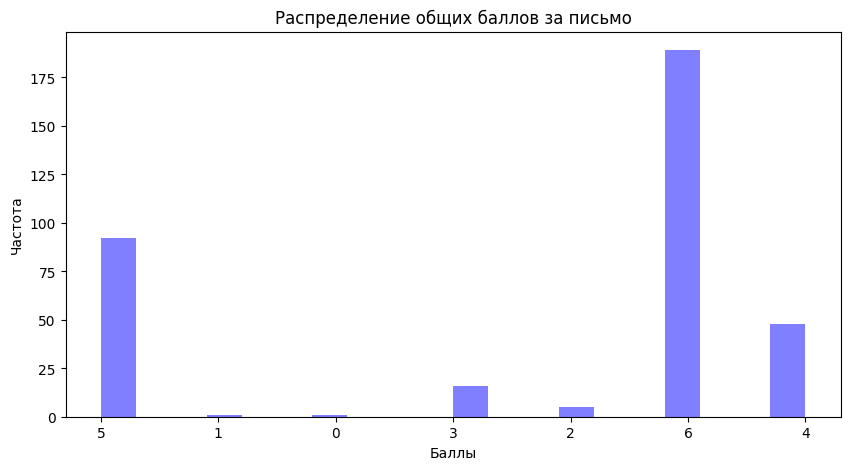

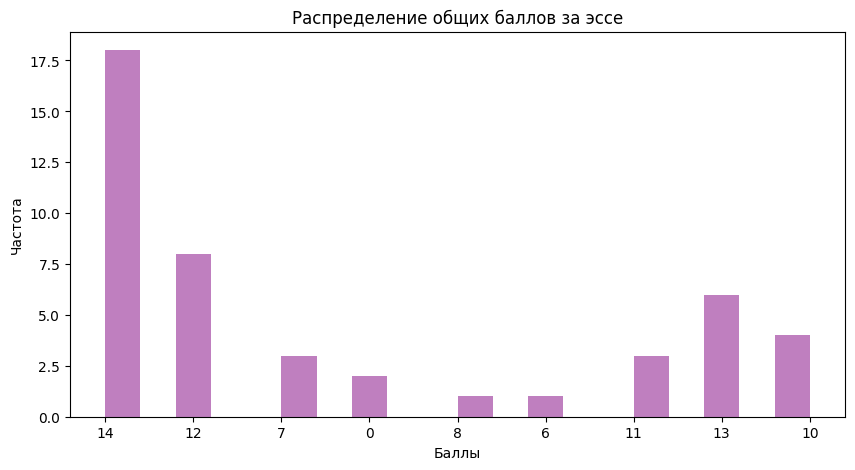

In [73]:
scores_email = email_data['Overall_score']
scores_essay = essay_data['Overall_score']

# Гистограмма общих баллов за письмо
plt.figure(figsize=(10, 5))
plt.hist(scores_email, bins=20, alpha=0.5, color='b')
plt.title('Распределение общих баллов за письмо')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

# Гистограмма общих баллов за эссе
plt.figure(figsize=(10, 5))
plt.hist(scores_essay, bins=20, alpha=0.5, color='purple')
plt.title('Распределение общих баллов за эссе')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

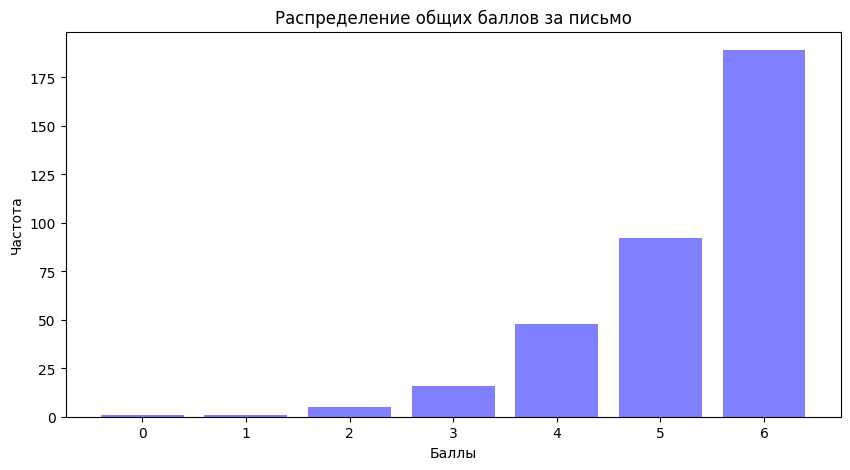

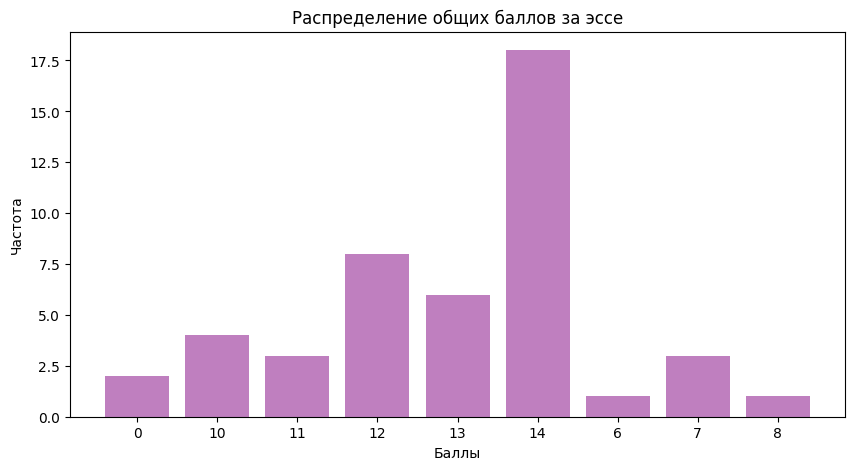

In [84]:
# упорядочим данные
scores_counts_email = pd.value_counts(scores_email).sort_index()
scores_counts_essay = pd.value_counts(scores_essay).sort_index()

plt.figure(figsize=(10, 5))
plt.bar(scores_counts_email.index, scores_counts_email.values, alpha=0.5, color='b')
plt.title('Распределение общих баллов за письмо')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(scores_counts_essay.index, scores_counts_essay.values, alpha=0.5, color='purple')
plt.title('Распределение общих баллов за эссе')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

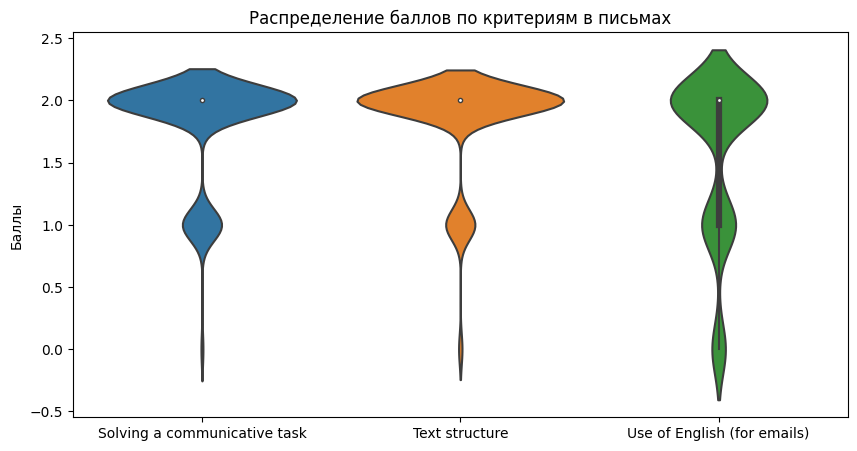

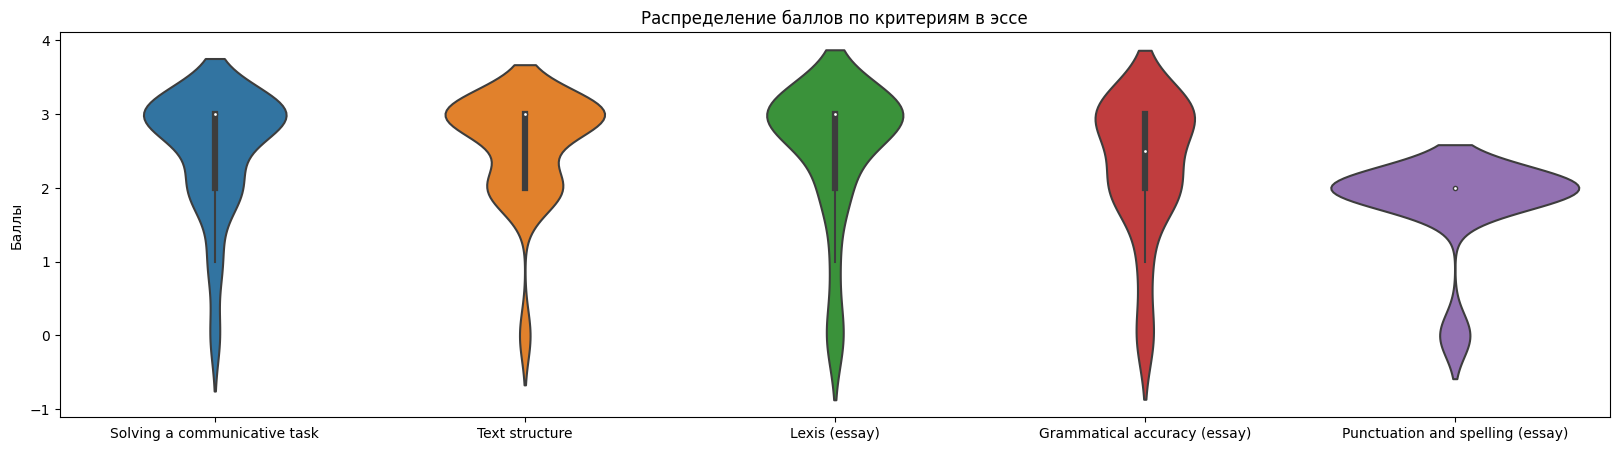

In [85]:
criteria_email = ['Solving a communicative task',	'Text structure',	'Use of English (for emails)']
criteria_essay = ['Solving a communicative task',	'Text structure',	'Lexis (essay)',	'Grammatical accuracy (essay)',	'Punctuation and spelling (essay)']

plt.figure(figsize=(10, 5))
sns.violinplot(data=email_data[criteria_email])
plt.title('Распределение баллов по критериям в письмах')
plt.ylabel('Баллы')
plt.show()

plt.figure(figsize=(20, 5))
sns.violinplot(data=essay_data[criteria_essay])
plt.title('Распределение баллов по критериям в эссе')
plt.ylabel('Баллы')
plt.show()